# Davis Franklin

## Research question/interests

**I would like to further investigate Apple's market capitalization by specifically looking at the effect that the release of a new iPhone has on Apple's market value.** I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer this research question by using an additional dataset that includes every iPhone. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times.

## Imports:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set_theme(style="ticks", font_scale=1.3)
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### Loading Data:

In [34]:
df_stocks = pd.read_csv("../data/raw/AAPL_stock.csv")
df_iPhone = pd.read_csv("../data/raw/iPhones.csv")

In [35]:
df_stocks.shape

(10443, 7)

In [36]:
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


## Data Understanding:

### For df_stocks:

In [37]:
df_stocks.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [38]:
df_stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [39]:
df_stocks.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For df_iPhone:

In [40]:
df_iPhone.shape

(37, 2)

In [41]:
df_iPhone.head()

,iPhone,Release_Date
0,iPhone 1st Gen,09/01/2007
1,iPhone 3G,09/05/2008
2,iPhone 3Gs,08/05/2009
3,iPhone 4,07/05/2010
4,iPhone 4S,4/10/2011


In [42]:
df_iPhone.dtypes

iPhone          object
Release_Date    object
dtype: object

In [43]:
df_iPhone.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,07/09/2022
freq,1,4


In [68]:
first_iPhone = df_iPhone['Release_Date'].min()
print(f"The first iPhone was released in: {first_iPhone}")

The first iPhone was released in: 2007-01-09 00:00:00


## Data Preperation:

##### In this step I converted the 'Date' column to be in datetime format, I renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces), and I checked if there was any null values for both datasets. After this step the data with be consistent and cleaned.

### For df_stocks

In [44]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [45]:
df_stocks = df_stocks.rename(columns={'Adj Close': 'Adj_Close'})
df_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [46]:
df_stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [72]:
df_stocks.to_csv('../data/processed/APPL_processed_analysis1.csv')

### For df_iPhones:

In [47]:
df_iPhone['Release_Date'] = pd.to_datetime(df_iPhone['Release_Date'], format='%d/%m/%Y')

In [48]:
df_iPhone.columns

Index(['iPhone', 'Release_Date'], dtype='object')

In [49]:
df_stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [71]:
df_iPhone.to_csv('../data/processed/iPhone_processed_analysis1.csv')

## Data Visualization:

### For df_stocks

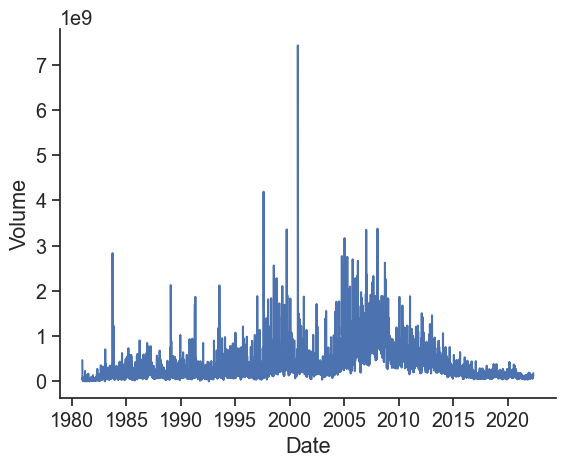

In [64]:
sns.lineplot(x='Date', y='Volume', data=df_stocks)
plt.show()

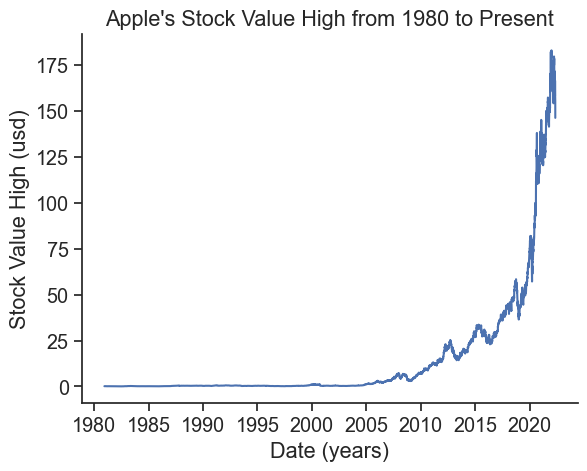

In [73]:
sns.lineplot(x='Date', y='High', data=df_stocks)
plt.title("Apple's Stock Value High from 1980 to Present")
plt.ylabel("Stock Value High (usd)")
plt.xlabel("Date (years)")
plt.show()

### Summary / Conclusion
##### This plot shows an overview of how Apple's stock value high has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value was low until the release of the first iPhone where the stock value began to increase rapidly.

### For df_iPhone:

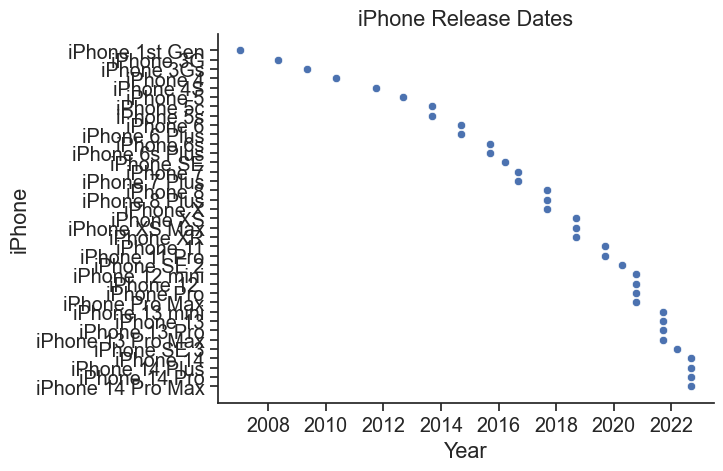

In [74]:
sns.scatterplot(x='Release_Date', y='iPhone', data=df_iPhone)
plt.xlabel("Year")
plt.ylabel("iPhone")
plt.title("iPhone Release Dates")
plt.show()